<a href="https://colab.research.google.com/github/FatherOfLove/258_DL/blob/master/258Graded_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**LOAD MNIST DATA**

In [0]:
#convert the code from txt file into csv file of the MNIST dataset
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("train_images", "train_labels",
        "mnist_train.csv", 60000)
convert("test_images", "test_labels",
        "mnist_test.csv", 10000)

FileNotFoundError: ignored

In [0]:
from mlxtend.data import loadlocal_mnist

In [0]:
X, y = loadlocal_mnist(
        images_path='/content/drive/My Drive/MNIST_data/train_images', 
        labels_path='/content/drive/My Drive/MNIST_data/train_labels')

train = pd.read_csv("/content/drive/My Drive/MNIST_data/mnist_train.csv")
test = pd.read_csv("/content/drive/My Drive/MNIST_data/mnist_test.csv")

NameError: ignored

In [0]:
Y_train = train["5"]

# Drop 'label' column
X_train = train.drop(labels = ["5"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

NameError: ignored

In [0]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [0]:
X_train = X_train / 255.0
test = test / 255.0

In [0]:
X_train = X_train.values.reshape
test = test.values.reshape

AttributeError: ignored

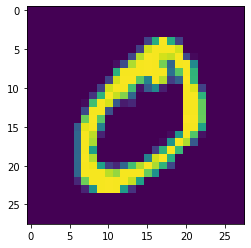

In [0]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 1 
batch_size = 86

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


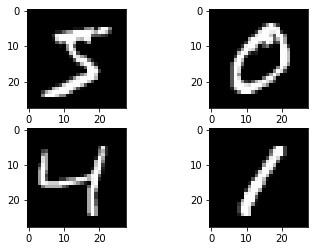

In [0]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 35s 578us/step - loss: 1.4173 - acc: 0.5083 - val_loss: 0.5379 - val_acc: 0.8362
Epoch 2/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.5321 - acc: 0.8324 - val_loss: 0.3309 - val_acc: 0.9015
Epoch 3/10
60000/60000 [==============================] - 35s 579us/step - loss: 0.3762 - acc: 0.8829 - val_loss: 0.2375 - val_acc: 0.9282
Epoch 4/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.2841 - acc: 0.9123 - val_loss: 0.1736 - val_acc: 0.9457
Epoch 5/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.2291 - acc: 0.9282 - val_loss: 0.1444 - val_acc: 0.9530
Epoch 6/10
60000/60000 [=======

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
def CNN_model():
  from keras.models import Sequential
  from keras.layers import BatchNormalization
  model = Sequential([
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (32,32,1)),#Dropout(0.75),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.75),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.75),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)),
         #Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         #Dropout(0.5),

         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'),#Dropout(0.25),
         BatchNormalization(axis=3),
         MaxPool2D(pool_size=(2,2)), 
         #Dropout(0.5),   

         Flatten(),   
         Dense(256, activation = "relu"),
         #Dropout(0.75),   
         (Dense(10, activation = "softmax"))])


  model.compile(optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) , 
                loss = "categorical_crossentropy", metrics=["accuracy"])

  return model

In [0]:
model = CNN_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       